<a href="https://colab.research.google.com/github/Loganath399/Computer-Vision-with-OpenCV-for-Modern-AI/blob/main/activity_3_(region_detection).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving exp7.jpg to exp7 (1).jpg


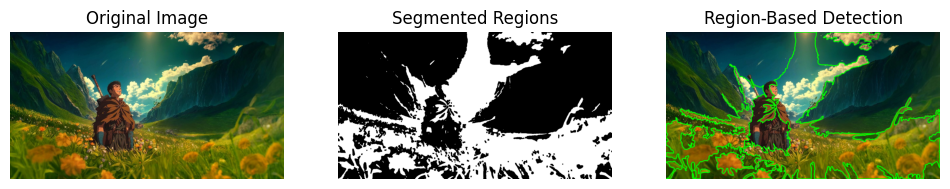

In [5]:
# Step 1: Import Libraries
import cv2
import numpy as np
from google.colab import files
from matplotlib import pyplot as plt

# Step 2: Upload Image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Step 3: Read Image
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Step 4: Convert to Grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Step 5: Apply Gaussian Blur (reduce noise)
blur = cv2.GaussianBlur(gray, (5,5), 0)

# Step 6: Region-Based Segmentation using OTSU Threshold
_, thresh = cv2.threshold(blur, 0, 255,
                          cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Step 7: Morphological Operations (remove small noise)
kernel = np.ones((5,5), np.uint8)
clean = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# Step 8: Find Regions (Contours)
contours, _ = cv2.findContours(clean,
                               cv2.RETR_EXTERNAL,
                               cv2.CHAIN_APPROX_SIMPLE)

# Step 9: Draw Detected Regions
region_img = img_rgb.copy()

for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > 1000:  # filter small regions
        cv2.drawContours(region_img, [cnt], -1, (0,255,0), 3)

# Step 10: Display Results
plt.figure(figsize=(12,5))

plt.subplot(1,3,1)
plt.title("Original Image")
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(1,3,2)
plt.title("Segmented Regions")
plt.imshow(clean, cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title("Region-Based Detection")
plt.imshow(region_img)
plt.axis('off')

plt.show()
